## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_dataset.csv')

## Performing exploratory data analysis

**Below diagram show the steps for EDA operation**

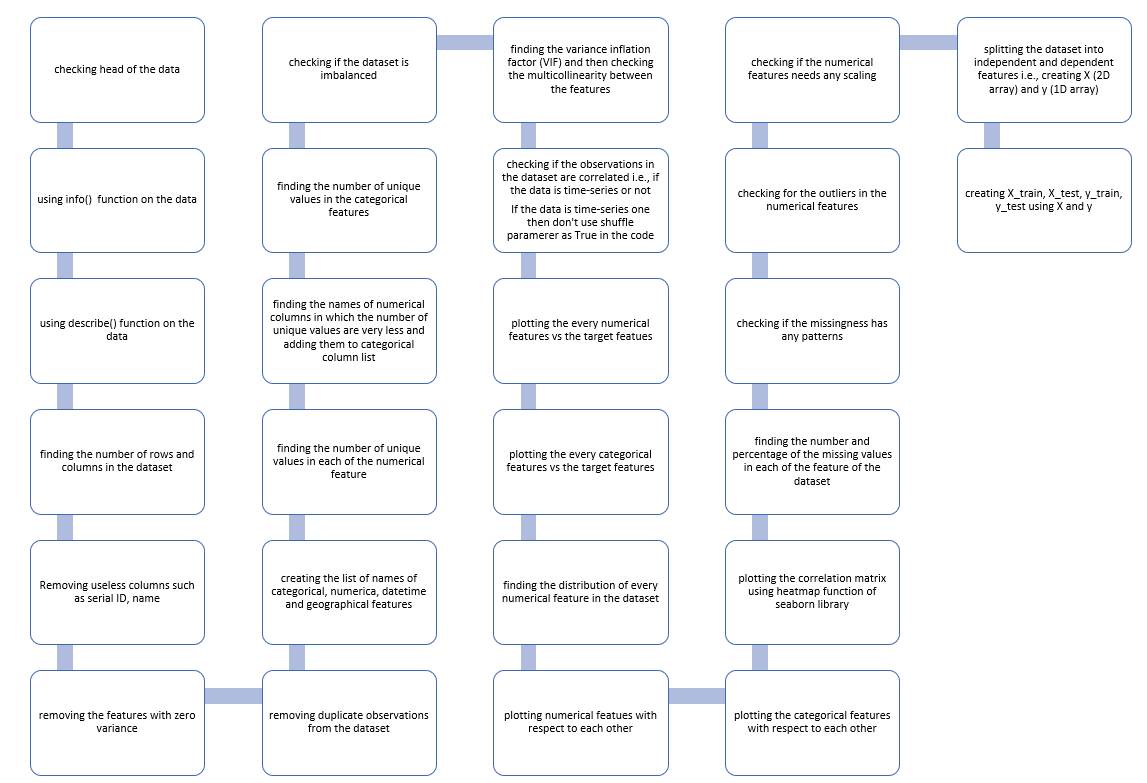

In [3]:
## checking the head of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## finding the basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
## finding the number of columns and rows in the dataset
print(f"The number of rows in the dataset are {df.shape[0]}.")
print(f"The number of columns in the dataset are {df.shape[1]}.")

The number of rows in the dataset are 891.
The number of columns in the dataset are 12.


In [7]:
## removing the useless columns from the dataset
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


**Since there are no features with the zero variance, we don't have to remove any features**

In [9]:
## dropping the duplicate rows from the dataset
df.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [10]:
## identifying the numerical, categorical, datetime and geographical features from the dataset
## This dataset doesn't have datetime and geographical features. 
## Now segregating the categorical and numerical features..
cat_feat = [feature for feature in df.columns if df[feature].dtypes == "O"]
num_feat = [feature for feature in df.columns if feature not in cat_feat]

In [11]:
cat_feat

['Sex', 'Cabin', 'Embarked']

In [12]:
num_feat

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [13]:
## There might be some encoded categorical columm names in the num_feat.
## We will identify them by finding the number of unique values in each of the numerical features
for feature in num_feat:
    print(f"Unique values in the feature {feature}: {df[feature].nunique()}")

Unique values in the feature Survived: 2
Unique values in the feature Pclass: 3
Unique values in the feature Age: 88
Unique values in the feature SibSp: 7
Unique values in the feature Parch: 7
Unique values in the feature Fare: 248


In [14]:
## here the features Survived, Pclass, SibSp, Parch have less than 10 categories. 
## Hence, we will remove them from num_feat and add them to cat_feat
for feature in ["Survived", "Pclass", "SibSp", "Parch"]:
    num_feat.remove(feature)
    cat_feat.append(feature)

In [15]:
cat_feat

['Sex', 'Cabin', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [16]:
num_feat

['Age', 'Fare']

In [17]:
## finding the number of unique values in the categorical features
for feature in cat_feat:
    print(f"Unique values in the feature {feature}: {df[feature].nunique()}")

Unique values in the feature Sex: 2
Unique values in the feature Cabin: 147
Unique values in the feature Embarked: 3
Unique values in the feature Survived: 2
Unique values in the feature Pclass: 3
Unique values in the feature SibSp: 7
Unique values in the feature Parch: 7


In [18]:
## Checking if the dataset is imbalanced or not
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Dataset doesn't seem to be imbalanced**

In [19]:
## combining the SibSp and Parch columns into relatives columns
df['Relatives'] = df['SibSp'] + df['Parch']
df.drop(columns=['SibSp',"Parch"],inplace=True)

In [20]:
cat_feat.remove('SibSp')
cat_feat.remove('Parch')
cat_feat.append('Relatives')

In [21]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0


In [22]:
cat_feat

['Sex', 'Cabin', 'Embarked', 'Survived', 'Pclass', 'Relatives']

In [23]:
## separating independent and dependent features
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [24]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives
0,3,male,22.0,7.2500,NaN,S,1
1,1,female,38.0,71.2833,C85,C,1
2,3,female,26.0,7.9250,NaN,S,0
3,1,female,35.0,53.1000,C123,S,1
4,3,male,35.0,8.0500,NaN,S,0


In [25]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

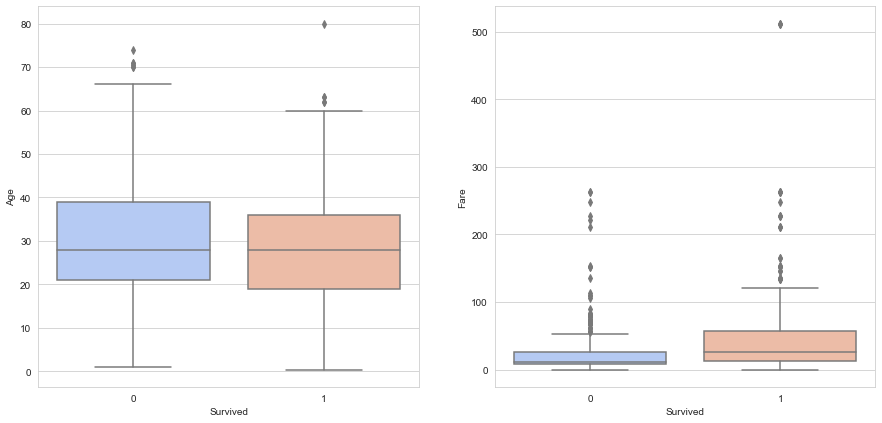

In [26]:
## ploting the numerical features with respect to target feature
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

for index, feature in enumerate(num_feat):
    plt.subplot(1,2,index+1)
    sns.boxplot(y=feature,x='Survived',data=df,palette='coolwarm')

**It seems there are some outliers in the age and fare features**

In [27]:
z = cat_feat.copy()

In [28]:
z.remove('Survived')
z.remove('Cabin')

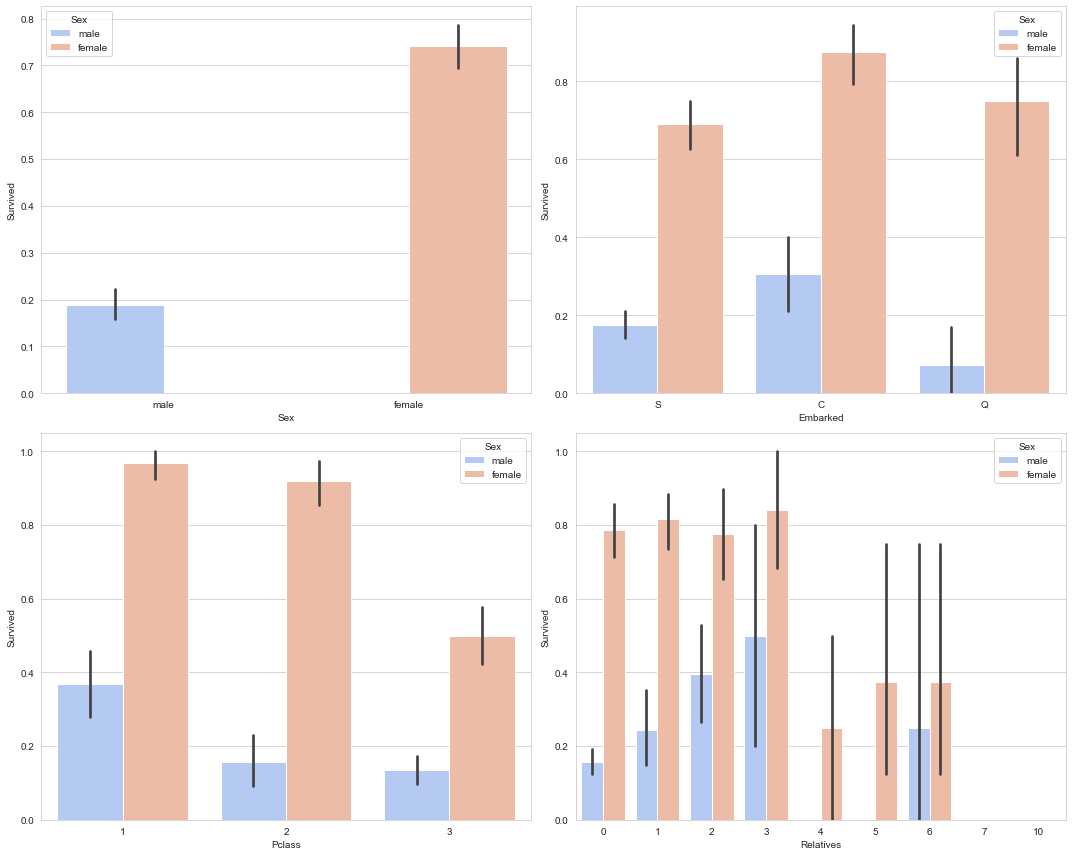

In [29]:
## plotting the categorical features with respect to target feature
sns.set_style('whitegrid')
plt.figure(figsize=(15,12))

for index, feature in enumerate(z):
    plt.subplot(2,2,index+1)
    sns.barplot(x=feature,y='Survived',hue='Sex',data=df,palette='coolwarm')
    
plt.tight_layout()

**Survival count of female travellers is more than male travellers in most cases**

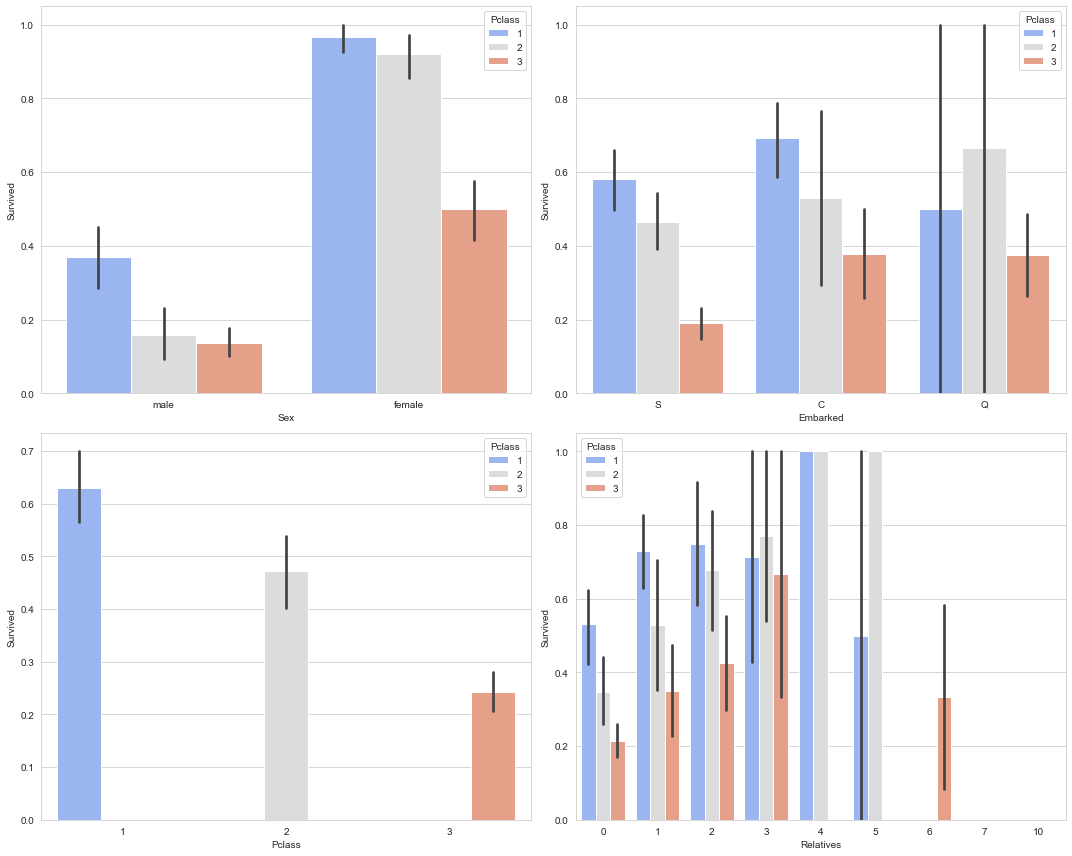

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,12))

for index, feature in enumerate(z):
    plt.subplot(2,2,index+1)
    sns.barplot(x=feature,y='Survived',hue='Pclass',data=df,palette='coolwarm')
    
plt.tight_layout()

**Survival count of travellers with Pclass 1 is more than the count of travellers with other Pclasses**

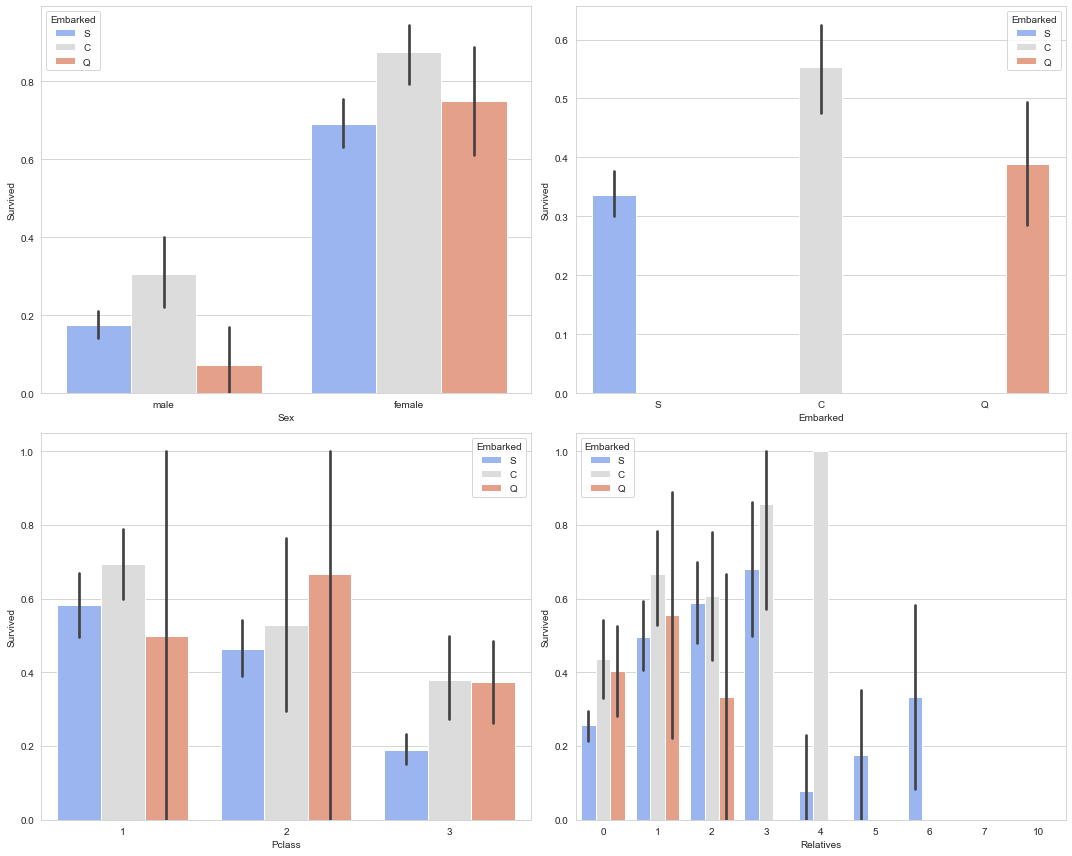

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,12))

for index, feature in enumerate(z):
    plt.subplot(2,2,index+1)
    sns.barplot(x=feature,y='Survived',hue='Embarked',data=df,palette='coolwarm')
    
plt.tight_layout()

**Survival count of travellers with Embarked 'C' is more than the count of travellers with other Embarked**

C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


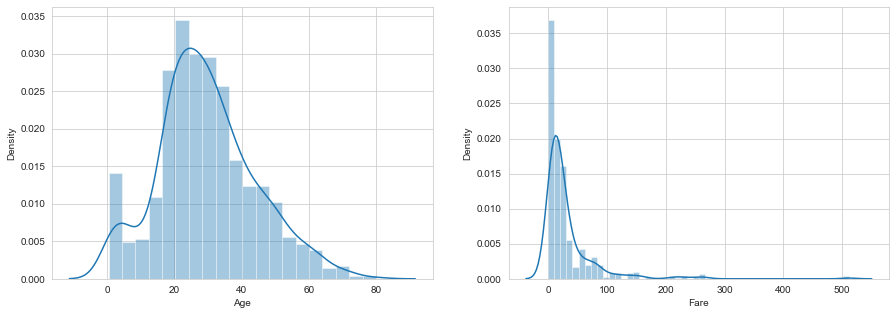

In [32]:
## checking the distribution of data in the numerical columns
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')

for index,feature in enumerate(num_feat):
    plt.subplot(1,2,index+1)
    sns.distplot(df[feature],kde=True)

**Age feature is approximately normal distributed while Fare feature is right skewed. Let's perform some operations on the Fare column to make it normally distributed**

C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

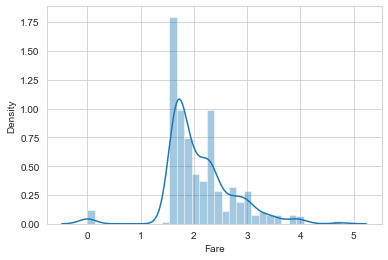

In [33]:
sns.distplot((df['Fare'])**(1/4),kde=True)

**This looks better than the original distribution**

In [34]:
df['Fare'] = (df['Fare'])**(1/4)

C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

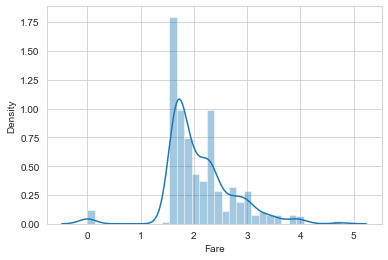

In [35]:
sns.distplot(df['Fare'],kde=True)

In [36]:
## checking for the missing values in the dataset
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          177
Fare           0
Cabin        687
Embarked       2
Relatives      0
dtype: int64

In [37]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives
0,0,3,male,22.0,1.640909,NaN,S,1
1,1,1,female,38.0,2.905674,C85,C,1
2,1,3,female,26.0,1.677837,NaN,S,0
3,1,1,female,35.0,2.699440,C123,S,1
4,0,3,male,35.0,1.684414,NaN,S,0


In [38]:
dataset = df.copy()

In [39]:
sex_dict = {'male':1,'female':2}
embarked_dict = {'S':1,'C':2,'Q':3}

dataset['Sex'] = dataset['Sex'].map(sex_dict)
dataset['Embarked'] = dataset['Embarked'].map(embarked_dict)

dataset['Age'].fillna(dataset['Age'].median(),inplace=True)
dataset['Cabin'].fillna('Missing',inplace=True)
dataset['Embarked'].fillna('S',inplace=True)
dataset.drop(['Cabin'],axis=1,inplace=True)

In [40]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,0,3,1,22.0,1.640909,1.0,1
1,1,1,2,38.0,2.905674,2.0,1
2,1,3,2,26.0,1.677837,1.0,0
3,1,1,2,35.0,2.699440,1.0,1
4,0,3,1,35.0,1.684414,1.0,0


<AxesSubplot:>

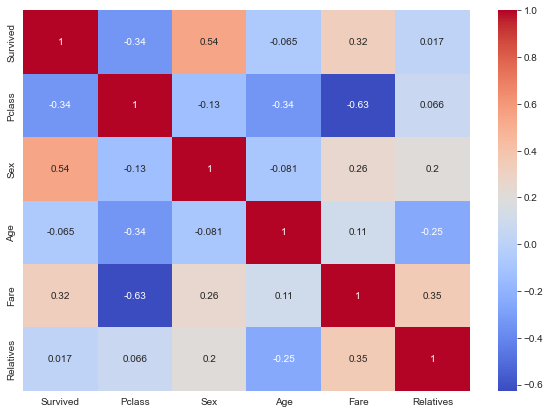

In [41]:
## checking the correlation between the features
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')

In [42]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives
0,0,3,male,22.0,1.640909,NaN,S,1
1,1,1,female,38.0,2.905674,C85,C,1
2,1,3,female,26.0,1.677837,NaN,S,0
3,1,1,female,35.0,2.699440,C123,S,1
4,0,3,male,35.0,1.684414,NaN,S,0


In [43]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=83489,stratify=y)

**Here we don't see much correlation between the independent feature.**

## Creating the pipeline for preprocessing of features

numerical features need:
1. missing values imputation
2. outlier removal
3. standization

some of the categorical features need oridinal encoding and some other needs the onehotencoding. So,let's create two pipelines for these two types:

categorical pipeline 1: (for the features Sex and Embarked)
   1. missing value imputation
   2. onehotencoding

categorical pipeline 2: (for feature Cabin)
   1. missing value imputation
   2. ordinal encoding

#### creating a custom transformer for the outlier removal

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

In [46]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    
    def __init__(self,factor):
        self.factor = factor
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        z = pd.DataFrame(X).copy()
        for i in range(z.shape[1]):
            Q1 = z.iloc[:,i].quantile(0.25)
            Q3 = z.iloc[:,i].quantile(0.75)
            IQR = Q3 - Q1
            z[(z.iloc[:,i] < (Q1 - self.factor*IQR)) | (z.iloc[:,i] > (Q3 + self.factor*IQR))] = np.nan
        return z

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [48]:
## creating numerical pipeline
num_pipeline = Pipeline([
    
    ('outlier_removal',OutlierRemover(1.5)),
    ('num_imputation',KNNImputer()),
    ('num_scaling',StandardScaler())
])

In [49]:
## creating categorical pipelines
cat_pipeline1 = Pipeline([
    
    ('cat_imputation1',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

cat_pipeline2 = Pipeline([
    
    ('ordinal_encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)),
    ('cat_imputation2',SimpleImputer(strategy='most_frequent')),
    
])

In [50]:
## combining the numerical and categorical pipelines to create a preprocessing pipeline
from sklearn.compose import ColumnTransformer

preprocessing_pipeline = ColumnTransformer([
    
    ('preprocess_step1',num_pipeline,num_feat),
    ('preprocess_step2',cat_pipeline1,['Sex','Embarked']),
    ('preprocess_step3',cat_pipeline2,['Cabin'])
],remainder='passthrough')

**1. Since we don't want our model to predict the survived people as not survived, hence false negative value should be small. This implies that our model should have high recall.**

**2. Since we don't want our model to predict the not survived people as survived, hence false positive value should be small. This implies that our model should have high precision.**

**We cannot get high values for both precision and recall. So let's just create a model and check what kind of precision/recall tradeoff we will get.**

In [51]:
## creating pipelines for the different models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

log_reg_pipe = Pipeline([
    ('logistic_regression_classifier',LogisticRegression(max_iter=2000))
])

knn_pipe = Pipeline([
    ('knn_classifier',KNeighborsClassifier(n_neighbors=3))
])

random_forest_pipe = Pipeline([
    ('random_forest_classifier',RandomForestClassifier(n_estimators=11,random_state=543487))
])

In [52]:
full_pipeline1 = Pipeline([
    ('preprocessing1',preprocessing_pipeline),
    ('model_training1',log_reg_pipe)
])

full_pipeline2 = Pipeline([
    ('preprocessing2',preprocessing_pipeline),
    ('model_training2',knn_pipe)
])


full_pipeline3 = Pipeline([
    ('preprocessing3',preprocessing_pipeline),
    ('model_training3',random_forest_pipe)
])

In [53]:
algos = ['Logistic regression','KNN classifier','Random forest classifier']
pipelines = [full_pipeline1,full_pipeline2,full_pipeline3]

In [54]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5,random_state=1047,shuffle=True)

for i in range(len(algos)):
    print(f"{algos[i]}:")
    print(f"The cross validation score for the {algos[i]} is {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='precision').mean(),3)} +/- {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='precision').std(),3)} (Scoring: Precision)")
    print(f"The cross validation score for the {algos[i]} is {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='recall').mean(),3)} +/- {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='recall').std(),3)} (Scoring: Recall)")
    print(f"The cross validation score for the {algos[i]} is {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='f1').mean(),3)} +/- {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='f1').std(),3)} (Scoring: f1 score)")

Logistic regression:
The cross validation score for the Logistic regression is 0.765 +/- 0.075 (Scoring: Precision)
The cross validation score for the Logistic regression is 0.707 +/- 0.063 (Scoring: Recall)
The cross validation score for the Logistic regression is 0.732 +/- 0.051 (Scoring: f1 score)
KNN classifier:
The cross validation score for the KNN classifier is 0.732 +/- 0.033 (Scoring: Precision)
The cross validation score for the KNN classifier is 0.661 +/- 0.082 (Scoring: Recall)
The cross validation score for the KNN classifier is 0.692 +/- 0.051 (Scoring: f1 score)
Random forest classifier:
The cross validation score for the Random forest classifier is 0.788 +/- 0.043 (Scoring: Precision)
The cross validation score for the Random forest classifier is 0.682 +/- 0.087 (Scoring: Recall)
The cross validation score for the Random forest classifier is 0.728 +/- 0.058 (Scoring: f1 score)


In [55]:
from sklearn.model_selection import cross_val_predict,StratifiedKFold

skf = StratifiedKFold(n_splits=5,random_state=1987,shuffle=True)

lr_positive_scores = cross_val_predict(full_pipeline1,X_train,y_train,cv=skf,method='predict_proba')[:,1]
knn_positive_scores = cross_val_predict(full_pipeline2,X_train,y_train,cv=skf,method='predict_proba')[:,1]
rf_positive_scores = cross_val_predict(full_pipeline3,X_train,y_train,cv=skf,method='predict_proba')[:,1]

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,lr_positive_scores)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_train,knn_positive_scores)
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_train,rf_positive_scores)

In [57]:
def plot_roc_curve(fpr, tpr, label=None):
    sns.set_style('darkgrid')
    plt.plot(fpr,tpr,label=label,c='g')
    plt.legend(loc="lower right")

Area under the ROC curve: 0.847


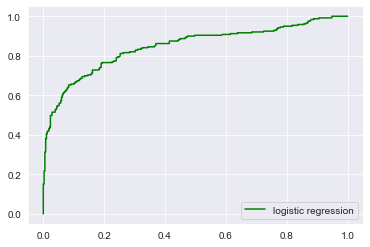

In [58]:
plot_roc_curve(fpr_lr,tpr_lr,'logistic regression')
print(f"Area under the ROC curve: {np.round(roc_auc_score(y_train,lr_positive_scores),3)}")

Area under the ROC curve: 0.806


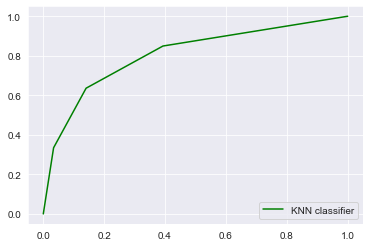

In [59]:
plot_roc_curve(fpr_knn,tpr_knn,'KNN classifier')
print(f"Area under the ROC curve: {np.round(roc_auc_score(y_train,knn_positive_scores),3)}")

Area under the ROC curve: 0.841


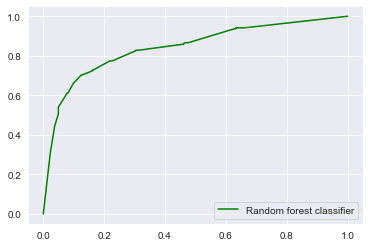

In [60]:
plot_roc_curve(fpr_rf,tpr_rf,'Random forest classifier')
print(f"Area under the ROC curve: {np.round(roc_auc_score(y_train,rf_positive_scores),3)}")

**This is giving us the average results.Let's try hyperparameter tuning to improve the results**

In [61]:
## hyperparanmeters for logistic regression classifier
full_pipeline1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing1', 'model_training1', 'preprocessing1__n_jobs', 'preprocessing1__remainder', 'preprocessing1__sparse_threshold', 'preprocessing1__transformer_weights', 'preprocessing1__transformers', 'preprocessing1__verbose', 'preprocessing1__verbose_feature_names_out', 'preprocessing1__preprocess_step1', 'preprocessing1__preprocess_step2', 'preprocessing1__preprocess_step3', 'preprocessing1__preprocess_step1__memory', 'preprocessing1__preprocess_step1__steps', 'preprocessing1__preprocess_step1__verbose', 'preprocessing1__preprocess_step1__outlier_removal', 'preprocessing1__preprocess_step1__num_imputation', 'preprocessing1__preprocess_step1__num_scaling', 'preprocessing1__preprocess_step1__outlier_removal__factor', 'preprocessing1__preprocess_step1__num_imputation__add_indicator', 'preprocessing1__preprocess_step1__num_imputation__copy', 'preprocessing1__preprocess_step1__num_imputation__metric', 'preprocessing1__preprocess_step1__num_imputatio

In [62]:
param1 = {}
param1['model_training1__logistic_regression_classifier__C'] = np.arange(1,11,1)
param1['model_training1__logistic_regression_classifier__solver'] = ['newton-cg','liblinear','sag','saga']

In [63]:
param1

{'model_training1__logistic_regression_classifier__C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'model_training1__logistic_regression_classifier__solver': ['newton-cg',
  'liblinear',
  'sag',
  'saga']}

In [64]:
## hyperparameters for KNN classifier
full_pipeline2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing2', 'model_training2', 'preprocessing2__n_jobs', 'preprocessing2__remainder', 'preprocessing2__sparse_threshold', 'preprocessing2__transformer_weights', 'preprocessing2__transformers', 'preprocessing2__verbose', 'preprocessing2__verbose_feature_names_out', 'preprocessing2__preprocess_step1', 'preprocessing2__preprocess_step2', 'preprocessing2__preprocess_step3', 'preprocessing2__preprocess_step1__memory', 'preprocessing2__preprocess_step1__steps', 'preprocessing2__preprocess_step1__verbose', 'preprocessing2__preprocess_step1__outlier_removal', 'preprocessing2__preprocess_step1__num_imputation', 'preprocessing2__preprocess_step1__num_scaling', 'preprocessing2__preprocess_step1__outlier_removal__factor', 'preprocessing2__preprocess_step1__num_imputation__add_indicator', 'preprocessing2__preprocess_step1__num_imputation__copy', 'preprocessing2__preprocess_step1__num_imputation__metric', 'preprocessing2__preprocess_step1__num_imputatio

In [65]:
param2 = {}
param2['model_training2__knn_classifier__n_neighbors'] = np.arange(2,11,1)
param2['model_training2__knn_classifier__weights'] = ['uniform','distance']

In [66]:
param2

{'model_training2__knn_classifier__n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'model_training2__knn_classifier__weights': ['uniform', 'distance']}

In [67]:
## hyperparameters for random forest classifier
full_pipeline3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing3', 'model_training3', 'preprocessing3__n_jobs', 'preprocessing3__remainder', 'preprocessing3__sparse_threshold', 'preprocessing3__transformer_weights', 'preprocessing3__transformers', 'preprocessing3__verbose', 'preprocessing3__verbose_feature_names_out', 'preprocessing3__preprocess_step1', 'preprocessing3__preprocess_step2', 'preprocessing3__preprocess_step3', 'preprocessing3__preprocess_step1__memory', 'preprocessing3__preprocess_step1__steps', 'preprocessing3__preprocess_step1__verbose', 'preprocessing3__preprocess_step1__outlier_removal', 'preprocessing3__preprocess_step1__num_imputation', 'preprocessing3__preprocess_step1__num_scaling', 'preprocessing3__preprocess_step1__outlier_removal__factor', 'preprocessing3__preprocess_step1__num_imputation__add_indicator', 'preprocessing3__preprocess_step1__num_imputation__copy', 'preprocessing3__preprocess_step1__num_imputation__metric', 'preprocessing3__preprocess_step1__num_imputatio

In [68]:
param3 = {}
param3['model_training3__random_forest_classifier__n_estimators'] = np.arange(100,1100,100)
param3['model_training3__random_forest_classifier__criterion'] = ['gini','entropy']
param3['model_training3__random_forest_classifier__max_features'] = ['auto','sqrt','log2']

In [69]:
param3

{'model_training3__random_forest_classifier__n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 'model_training3__random_forest_classifier__criterion': ['gini', 'entropy'],
 'model_training3__random_forest_classifier__max_features': ['auto',
  'sqrt',
  'log2']}

In [70]:
param = [param1,param2,param3]

In [72]:
from sklearn.model_selection import RandomizedSearchCV

for i in range(len(pipelines)):
    a = RandomizedSearchCV(pipelines[i],param[i],scoring='f1',random_state=23498)
    b = a.fit(X_train,y_train)
    print(f"The hyperparameters for the {algos[i]} are:")
    print(b.best_params_)

The hyperparameters for the Logistic regression are:
{'model_training1__logistic_regression_classifier__solver': 'newton-cg', 'model_training1__logistic_regression_classifier__C': 4}
The hyperparameters for the KNN classifier are:
{'model_training2__knn_classifier__weights': 'distance', 'model_training2__knn_classifier__n_neighbors': 10}
The hyperparameters for the Random forest classifier are:
{'model_training3__random_forest_classifier__n_estimators': 300, 'model_training3__random_forest_classifier__max_features': 'sqrt', 'model_training3__random_forest_classifier__criterion': 'entropy'}


In [73]:
## setting hyperparameters of logistic regression
full_pipeline1.named_steps['model_training1'].named_steps['logistic_regression_classifier'].set_params(solver='newton-cg',C=4)

LogisticRegression(C=4, max_iter=2000, solver='newton-cg')

In [74]:
## setting hyperparameters for KNeighbourClassifier
full_pipeline2.named_steps['model_training2'].named_steps['knn_classifier'].set_params(n_neighbors=10,weights='distance')

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [75]:
## setting hyperparameters for decision tree classifier
full_pipeline3.named_steps['model_training3'].named_steps['random_forest_classifier'].set_params(criterion='entropy',max_features='sqrt',bootstrap=True,n_jobs=-1)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=11, n_jobs=-1, random_state=543487)

**Visualizing the full pipelines**

In [76]:
from sklearn import set_config
set_config(display='diagram')  

In [77]:
full_pipeline1

Pipeline(steps=[('preprocessing1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocess_step1',
                                                  Pipeline(steps=[('outlier_removal',
                                                                   OutlierRemover(factor=1.5)),
                                                                  ('num_imputation',
                                                                   KNNImputer()),
                                                                  ('num_scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('preprocess_step2',
                                                  Pipeline(steps=[('cat_imputation1',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                  ['Sex', 'Embarked']),
                                                 ('preprocess_step3',
                                                  Pipeline(steps=[('ordinal_encoding',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('cat_imputation2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Cabin'])])),
                ('model_training1',
                 Pipeline(steps=[('logistic_regression_classifier',
                                  LogisticRegression(C=4, max_iter=2000,
                                                     solver='newton-cg'))]))])

In [78]:
full_pipeline2

Pipeline(steps=[('preprocessing2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocess_step1',
                                                  Pipeline(steps=[('outlier_removal',
                                                                   OutlierRemover(factor=1.5)),
                                                                  ('num_imputation',
                                                                   KNNImputer()),
                                                                  ('num_scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('preprocess_step2',
                                                  Pipeline(steps=[('cat_imputation1',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked']),
                                                 ('preprocess_step3',
                                                  Pipeline(steps=[('ordinal_encoding',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('cat_imputation2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Cabin'])])),
                ('model_training2',
                 Pipeline(steps=[('knn_classifier',
                                  KNeighborsClassifier(n_neighbors=10,
                                                       weights='distance'))]))])

In [79]:
full_pipeline3

Pipeline(steps=[('preprocessing3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocess_step1',
                                                  Pipeline(steps=[('outlier_removal',
                                                                   OutlierRemover(factor=1.5)),
                                                                  ('num_imputation',
                                                                   KNNImputer()),
                                                                  ('num_scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('preprocess_step2',
                                                  Pipeline(steps=[('cat_imputation1',
                                                                   SimpleImputer(strategy='most_frequent')...
                                                  Pipeline(steps=[('ordinal_encoding',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('cat_imputation2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Cabin'])])),
                ('model_training3',
                 Pipeline(steps=[('random_forest_classifier',
                                  RandomForestClassifier(criterion='entropy',
                                                         max_features='sqrt',
                                                         n_estimators=11,
                                                         n_jobs=-1,
                                                         random_state=543487))]))])

**Saving the full pipelines as html files**

In [80]:
from sklearn.utils import estimator_html_repr

In [81]:
with open('full_pipeline1.html', 'w',encoding="utf-8") as f:  
    f.write(estimator_html_repr(full_pipeline1))

In [82]:
with open('full_pipeline2.html', 'w',encoding="utf-8") as f:  
    f.write(estimator_html_repr(full_pipeline2))

In [83]:
with open('full_pipeline3.html', 'w',encoding="utf-8") as f:  
    f.write(estimator_html_repr(full_pipeline3))

In [84]:
from sklearn.model_selection import cross_val_score
kf = StratifiedKFold(n_splits=5,random_state=1047,shuffle=True)

for i in range(len(algos)):
    print(f"{algos[i]}:")
    print(f"The cross validation score for the {algos[i]} is {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='precision').mean(),3)} +/- {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='precision').std(),3)} (Scoring: Precision)")
    print(f"The cross validation score for the {algos[i]} is {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='recall').mean(),3)} +/- {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='recall').std(),3)} (Scoring: Recall)")
    print(f"The cross validation score for the {algos[i]} is {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='f1').mean(),3)} +/- {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=skf,scoring='f1').std(),3)} (Scoring: f1 score)\n")

Logistic regression:
The cross validation score for the Logistic regression is 0.755 +/- 0.08 (Scoring: Precision)
The cross validation score for the Logistic regression is 0.703 +/- 0.063 (Scoring: Recall)
The cross validation score for the Logistic regression is 0.726 +/- 0.059 (Scoring: f1 score)

KNN classifier:
The cross validation score for the KNN classifier is 0.796 +/- 0.054 (Scoring: Precision)
The cross validation score for the KNN classifier is 0.695 +/- 0.071 (Scoring: Recall)
The cross validation score for the KNN classifier is 0.74 +/- 0.053 (Scoring: f1 score)

Random forest classifier:
The cross validation score for the Random forest classifier is 0.78 +/- 0.051 (Scoring: Precision)
The cross validation score for the Random forest classifier is 0.691 +/- 0.075 (Scoring: Recall)
The cross validation score for the Random forest classifier is 0.731 +/- 0.054 (Scoring: f1 score)



In [86]:
skf = StratifiedKFold(n_splits=5,random_state=1987,shuffle=True)

lr_positive_scores = cross_val_predict(full_pipeline1,X_train,y_train,cv=skf,method='predict_proba')[:,1]
knn_positive_scores = cross_val_predict(full_pipeline2,X_train,y_train,cv=skf,method='predict_proba')[:,1]
rf_positive_scores = cross_val_predict(full_pipeline3,X_train,y_train,cv=skf,method='predict_proba')[:,1]

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,lr_positive_scores)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_train,knn_positive_scores)
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_train,rf_positive_scores)

Area under the ROC curve: 0.847


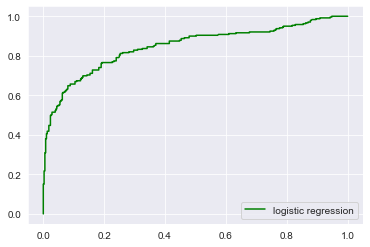

In [88]:
plot_roc_curve(fpr_lr,tpr_lr,'logistic regression')
print(f"Area under the ROC curve: {np.round(roc_auc_score(y_train,lr_positive_scores),3)}")

Area under the ROC curve: 0.833


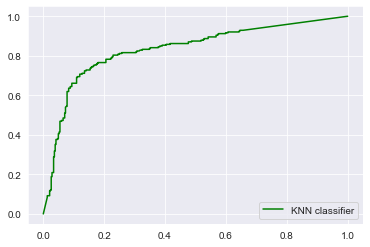

In [89]:
plot_roc_curve(fpr_knn,tpr_knn,'KNN classifier')
print(f"Area under the ROC curve: {np.round(roc_auc_score(y_train,knn_positive_scores),3)}")

Area under the ROC curve: 0.838


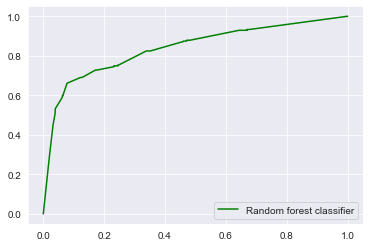

In [90]:
plot_roc_curve(fpr_rf,tpr_rf,'Random forest classifier')
print(f"Area under the ROC curve: {np.round(roc_auc_score(y_train,rf_positive_scores),3)}")

In [106]:
from sklearn.ensemble import BaggingClassifier

log_reg_bag = BaggingClassifier(LogisticRegression(C=4, max_iter=2000, solver='newton-cg'),n_estimators=500,max_features=3)
log_reg_bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=10, weights='distance'),n_estimators=500,max_features=3)

In [107]:
full_pipeline4 = Pipeline([
    ('preprocessing4',preprocessing_pipeline),
    ('model_training4',log_reg_bag)
])

full_pipeline5 = Pipeline([
    ('preprocessing5',preprocessing_pipeline),
    ('model_training5',log_reg_bag)
])

**Models are still giving us ok-ok accuracy. Now let's use VotingClassifier with top three classifiers**

In [108]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([
    
    ('log',full_pipeline4),
    ('knn',full_pipeline5),
    ('rfc',full_pipeline3)
],voting='soft')

In [109]:
skf = StratifiedKFold(n_splits=5,random_state=1987,shuffle=True)

vc_positive_scores = cross_val_predict(vc,X_train,y_train,cv=skf,method='predict_proba')[:,1]

In [110]:
fpr_vc, tpr_vc, threshold_vc = roc_curve(y_train,vc_positive_scores)

Area under the ROC curve: 0.865


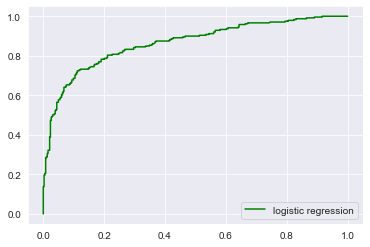

In [111]:
plot_roc_curve(fpr_vc,tpr_vc,'logistic regression')
print(f"Area under the ROC curve: {np.round(roc_auc_score(y_train,vc_positive_scores),3)}")

**These scores looks somewhat better**

**Now let's test this on test data...**

In [112]:
final_model = vc.fit(X_train,y_train)
y_pred = final_model.predict(X_test)

In [113]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

**Now let's check the accuracy of the predictions**

In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

print(f"The precision score of the final model is {np.round(precision_score(y_test,y_pred),3)}")
print(f"The recall score of the final model is {np.round(recall_score(y_test,y_pred),3)}")
print(f"The f1 score of the final model is {np.round(f1_score(y_test,y_pred),3)}")

The precision score of the final model is 0.825
The recall score of the final model is 0.641
The f1 score of the final model is 0.721


In [115]:
confusion_matrix(y_test,y_pred)

array([[151,  14],
       [ 37,  66]], dtype=int64)

**Saving the final model as a pickle file**

In [117]:
import joblib

joblib.dump(final_model,'titanic_dataset_final_model.pkl')

['titanic_dataset_final_model.pkl']